In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
import pandas as pd

# Loading the dataset
file_path = '/content/CC GENERAL.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset and its summary
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

(None,
   CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
 0  C10001    40.900749           0.818182      95.40              0.00   
 1  C10002  3202.467416           0.909091       0.00              0.00   
 2  C10003  2495.148862           1.000000     773.17            773.17   
 3  C10004  1666.670542           0.636364    1499.00           1499.00   
 4  C10005   817.714335           1.000000      16.00             16.00   
 
    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
 0                    95.4      0.000000             0.166667   
 1                     0.0   6442.945483             0.000000   
 2                     0.0      0.000000             1.000000   
 3                     0.0    205.788017             0.083333   
 4                     0.0      0.000000             0.083333   
 
    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
 0                    0.000000                          0.083333   
 1           

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handling missing values by imputing with the median
data_imputed = data.copy()
imputer = SimpleImputer(strategy='median')
numeric_columns = data_imputed.select_dtypes(include=['float64', 'int64']).columns
data_imputed[numeric_columns] = imputer.fit_transform(data_imputed[numeric_columns])

# Normalizing numerical columns for clustering
scaler = StandardScaler()
data_normalized = data_imputed.copy()
data_normalized[numeric_columns] = scaler.fit_transform(data_imputed[numeric_columns])

# Saving the preprocessed data
preprocessed_data = data_normalized.drop(columns=["CUST_ID"], errors="ignore")
preprocessed_data.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


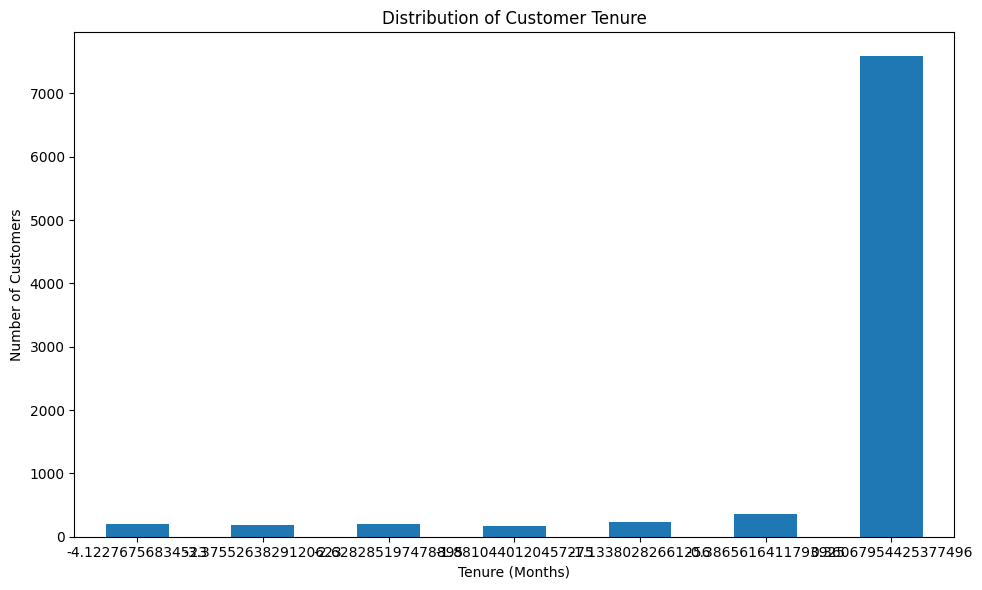

In [3]:
import matplotlib.pyplot as plt

def plot_tenure_distribution(data):
    """
    Plots a bar chart for the distribution of tenure in the dataset.
    """
    tenure_counts = data['TENURE'].value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    tenure_counts.plot(kind='bar')
    plt.title('Distribution of Customer Tenure')
    plt.xlabel('Tenure (Months)')
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Generating the categorical plot
plot_tenure_distribution(preprocessed_data)


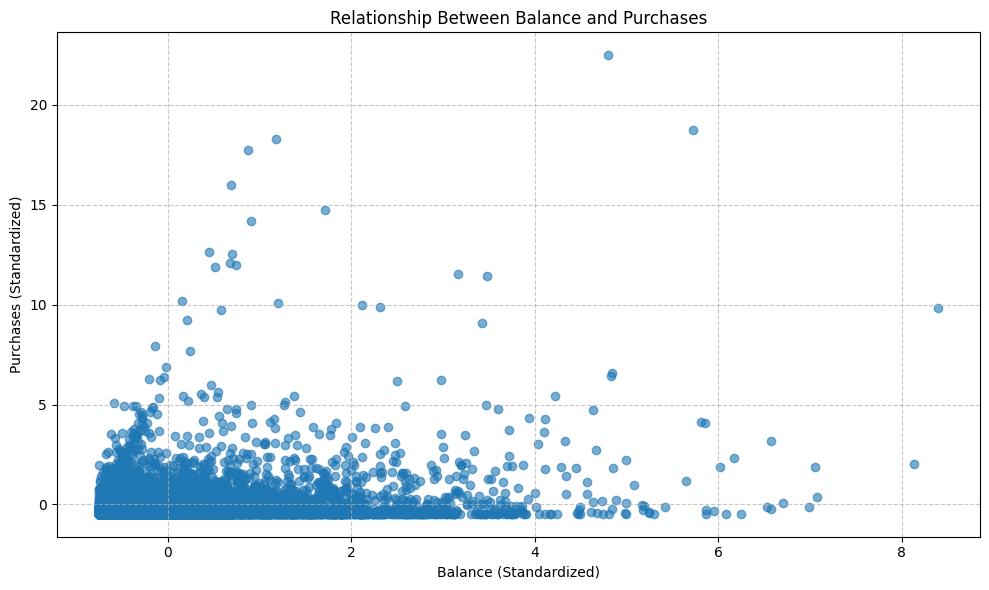

In [4]:
def plot_balance_vs_purchases(data):
    """
    Plots a scatter plot showing the relationship between balance and purchases.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(data['BALANCE'], data['PURCHASES'], alpha=0.6)
    plt.title('Relationship Between Balance and Purchases')
    plt.xlabel('Balance (Standardized)')
    plt.ylabel('Purchases (Standardized)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Generate the relational plot
plot_balance_vs_purchases(preprocessed_data)


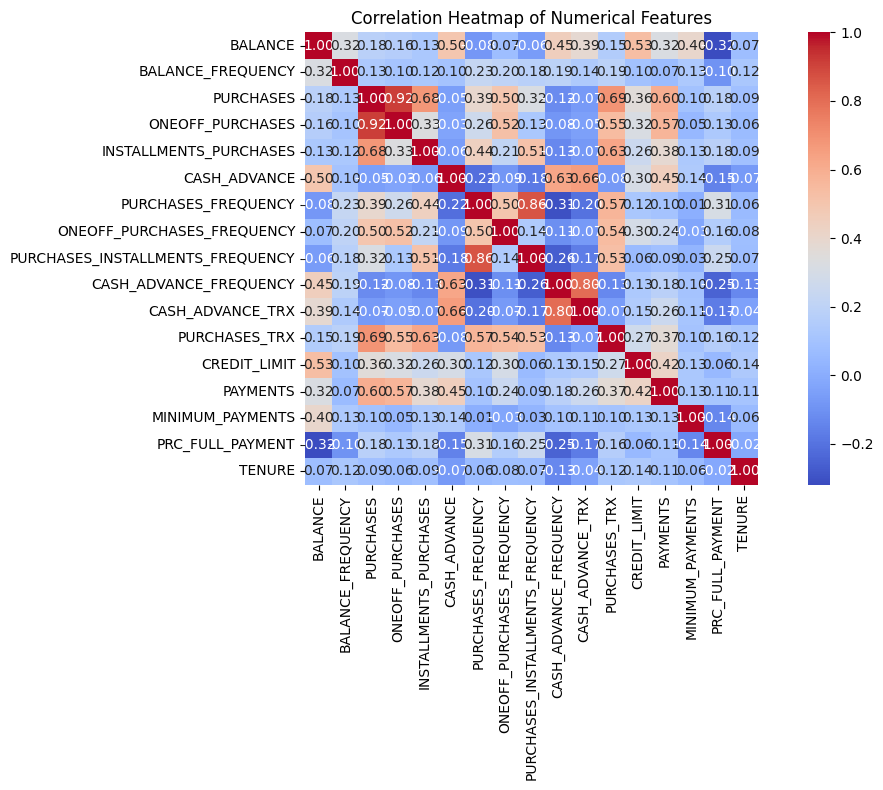

In [5]:
import seaborn as sns

def plot_correlation_heatmap(data):
    """
    Plots a heatmap showing correlations among numeric features in the dataset.
    """
    correlation_matrix = data.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title('Correlation Heatmap of Numerical Features')
    plt.tight_layout()
    plt.show()

# Generate the statistical plot
plot_correlation_heatmap(preprocessed_data)


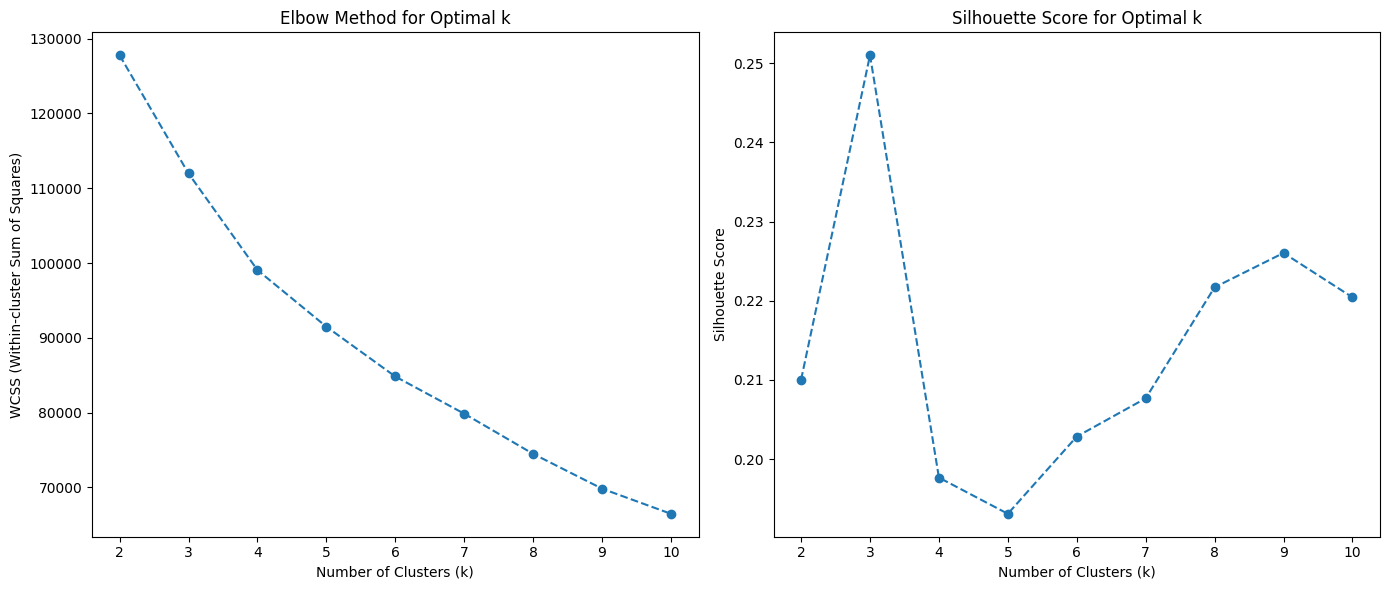

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def elbow_and_silhouette_analysis(data, max_clusters=10):
    """
    Performs elbow and silhouette analysis for K-Means clustering.
    """
    wcss = []  # Within-cluster sum of squares
    silhouette_scores = []

    # Test cluster sizes from 2 to max_clusters
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    # Plotting the Elbow method
    plt.figure(figsize=(14, 6))

    # Elbow Plot
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_clusters + 1), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS (Within-cluster Sum of Squares)')

    # Silhouette Plot
    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
    plt.title('Silhouette Score for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')

    plt.tight_layout()
    plt.show()

# Perform the elbow and silhouette analysis
elbow_and_silhouette_analysis(preprocessed_data)


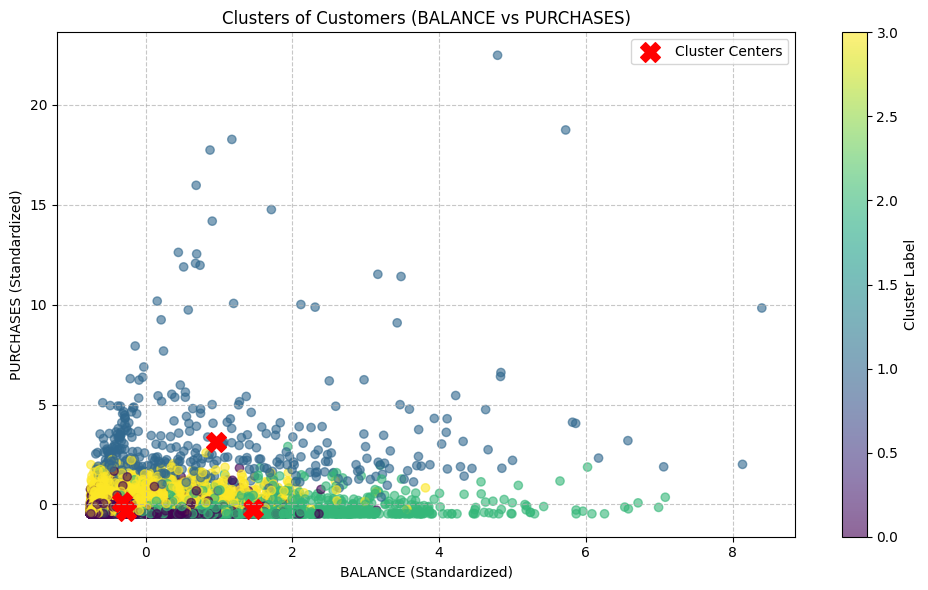

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply KMeans clustering with the optimal number of clusters (e.g., 4)
optimal_clusters = 4  # Change if needed based on analysis

def apply_kmeans_clustering(data, n_clusters):
    """
    Applies K-Means clustering and returns the cluster labels and cluster centers.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data)
    cluster_centers = kmeans.cluster_centers_
    return labels, cluster_centers

# Get clustering results
labels, cluster_centers = apply_kmeans_clustering(preprocessed_data, optimal_clusters)

# Add cluster labels to the dataset for visualization
clustered_data = preprocessed_data.copy()
clustered_data['Cluster'] = labels

# Visualize the clusters using balance and purchases
def plot_clusters(data, centers, x_feature, y_feature):
    """
    Plots the clusters with their centers on a scatter plot.
    """
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(data[x_feature], data[y_feature], c=data['Cluster'], cmap='viridis', alpha=0.6)
    plt.scatter(centers[:, preprocessed_data.columns.get_loc(x_feature)],
                centers[:, preprocessed_data.columns.get_loc(y_feature)],
                c='red', marker='X', s=200, label='Cluster Centers')
    plt.title(f'Clusters of Customers ({x_feature} vs {y_feature})')
    plt.xlabel(f'{x_feature} (Standardized)')
    plt.ylabel(f'{y_feature} (Standardized)')
    plt.legend()
    plt.colorbar(scatter, label='Cluster Label')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot clusters for 'BALANCE' and 'PURCHASES'
plot_clusters(clustered_data, cluster_centers, 'BALANCE', 'PURCHASES')


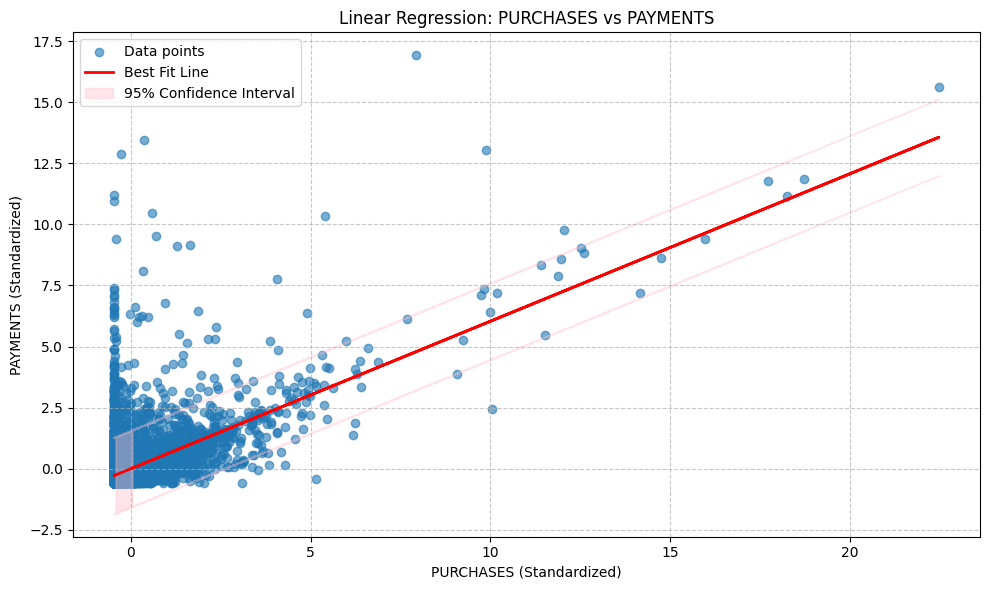

In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

def perform_line_fitting(data, x_feature, y_feature):
    """
    Fits a linear regression model and plots the line of best fit
    with confidence intervals.
    """
    # Extract features
    X = data[[x_feature]].values
    y = data[y_feature].values

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Calculate confidence intervals
    residuals = y - y_pred
    mean_residual = np.mean(residuals)
    std_residual = np.std(residuals)
    conf_interval = 1.96 * std_residual  # Approx 95% CI

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.6, label='Data points')
    plt.plot(X, y_pred, color='red', label='Best Fit Line', linewidth=2)
    plt.fill_between(
        X.flatten(),
        y_pred - conf_interval,
        y_pred + conf_interval,
        color='pink',
        alpha=0.4,
        label='95% Confidence Interval'
    )
    plt.title(f'Linear Regression: {x_feature} vs {y_feature}')
    plt.xlabel(f'{x_feature} (Standardized)')
    plt.ylabel(f'{y_feature} (Standardized)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Perform line fitting for 'PURCHASES' vs 'PAYMENTS'
perform_line_fitting(preprocessed_data, 'PURCHASES', 'PAYMENTS')
